In [87]:
import cv2
import matplotlib.pyplot as plt
import json
import os
from PIL import Image,ImageFont,ImageDraw
from googletrans import Translator
from sys import stdout

In [76]:
path_dir = ["/data/train/labels/나무/",
           "/data/train/labels/남자사람/",
           "/data/train/labels/여자사람/",
           "/data/train/labels/집/"]
label = []

for path in path_dir:
    for i in range(7,14):
        temp = []
        file_tree = os.listdir(path+str(i))
        for index,dir in enumerate(file_tree):
            with open(path +str(i)+'/'+ dir) as f:
                json_object = json.load(f)
                temp.append(json_object['annotations'])
                temp[index]['img_path'] = json_object['meta']['img_path']
                temp[index]['img_path'] = temp[index]['img_path'].replace('../../../../','/data/train/')
        label.extend(temp)



In [79]:
row = label[2]
print(row)

{'anno_id': 'plyjia8dtyrw840py4n5ia', 'class': '나무', 'bbox_count': 19, 'bbox': [{'label': '나무전체', 'x': 178, 'y': 18, 'w': 548, 'h': 975}, {'label': '기둥', 'x': 303, 'y': 405, 'w': 305, 'h': 477}, {'label': '수관', 'x': 180, 'y': 20, 'w': 545, 'h': 518}, {'label': '가지', 'x': 259, 'y': 172, 'w': 357, 'h': 292}, {'label': '뿌리', 'x': 296, 'y': 827, 'w': 318, 'h': 166}, {'label': '나뭇잎', 'x': 257, 'y': 166, 'w': 58, 'h': 74}, {'label': '나뭇잎', 'x': 365, 'y': 49, 'w': 58, 'h': 101}, {'label': '나뭇잎', 'x': 498, 'y': 121, 'w': 98, 'h': 75}, {'label': '꽃', 'x': 696, 'y': 625, 'w': 168, 'h': 207}, {'label': '열매', 'x': 245, 'y': 435, 'w': 56, 'h': 66}, {'label': '열매', 'x': 594, 'y': 351, 'w': 69, 'h': 76}, {'label': '그네', 'x': 884, 'y': 474, 'w': 358, 'h': 384}, {'label': '새', 'x': 947, 'y': 0, 'w': 252, 'h': 262}, {'label': '다람쥐', 'x': 560, 'y': 602, 'w': 77, 'h': 136}, {'label': '구름', 'x': 687, 'y': 7, 'w': 238, 'h': 221}, {'label': '달', 'x': 35, 'y': 54, 'w': 111, 'h': 192}, {'label': '별', 'x': 182,

(-0.5, 1279.5, 1279.5, -0.5)

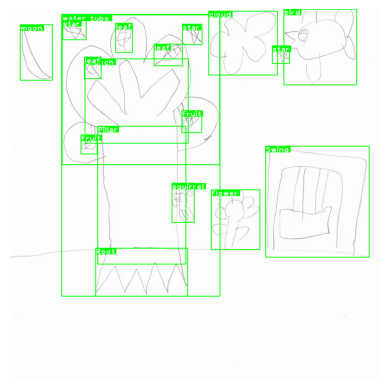

In [80]:
translator = Translator()

img = cv2.imread(row['img_path'])

for a in row['bbox']:
    w = a['w']
    h = a['h']
    x = a['x']
    y = a['y']
    cv2.rectangle(
      img,
      (int(x), int(y)),
      (int(x + w), int(y + h)),
      color=(0, 255, 0),
      thickness=2
    )
    name = translator.translate(a['label']).text
    ((label_width, label_height), _) = cv2.getTextSize(
        name,
        fontFace=cv2.FONT_HERSHEY_PLAIN,
        fontScale=1.75,
        thickness=2
    )
    cv2.rectangle(
      img,
      (int(x), int(y)),
      (int(x + label_width + label_width * 0.05), int(y + label_height + label_height * 0.25)),
      color=(0, 255, 0),
      thickness=cv2.FILLED
    )
    cv2.putText(
      img,
      name,
      org=(int(x), int(y + label_height + label_height * 0.25)), # bottom left
      fontFace=cv2.FONT_HERSHEY_PLAIN,
      fontScale=1.75,
      color=(255, 255, 255),
      thickness=2
    )



plt.imshow(img)
plt.axis('off')

In [89]:

def create_dataset(categories):
    label_path = '/data/yolov5-master/datasets/custom/labels/train2017/'
    img_path = '/data/yolov5-master/datasets/custom/images/train2017/'
    
    for count, img in enumerate(label):
        images_name = f"{img['anno_id']}.jpeg"
        imgdata = Image.open(img['img_path'])
        imgdata.save(img_path+images_name, "JPEG")
        
        label_name= f"{img['anno_id']}.txt"
        
        with(open(label_path+label_name,mode="w")) as label_file:
            for a in img['bbox']:
                category_idx = categories.index(a['label'])
                
                xcenter = (a['x'] + a['w'] / 2) / 1280 # 1280 = 이미지 너비
                ycenter = (a['y'] + a['h'] / 2) / 1280 # 1280 = 이미지 높이
                
                w = a['w'] / 1280
                h = a['h'] / 1280
                
                label_file.write(
                    f"{category_idx} {xcenter} {ycenter} {w} {h}\n"
                )
        stdout.write("\r===== "+str(count)+"/"+str(len(label)-1)+" progressed=====")
        stdout.flush()

In [85]:
categories = [
"집전체",
"지붕",
"집벽",
"문",
"창문",
"굴뚝",
"연기",
"울타리",
"길",
"연못",
"산",
"나무",
"꽃",
"잔디",
"태양",
"나무전체",
"기둥",
"수관",
"가지",
"뿌리",
"나뭇잎",
"꽃",
"열매",
"그네",
"새",
"다람쥐",
"구름",
"달",
"별",
"사람전체",
"머리",
"얼굴",
"눈",
"코",
"입",
"귀",
"머리카락",
"목",
"상체",
"팔",
"손",
"다리",
"발",
"단추",
"주머니",
"운동화",
"여자구두",
"남자구두"
]

In [90]:
create_dataset(categories)

===== 999/999 progressed=====